<a href="https://colab.research.google.com/github/nkilaru213/ai-excercises/blob/main/overall_analysis_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Loading the admissions data for analysis
admissions=pd.read_csv('/content/drive/My Drive/Exercises/ADMISSIONS.csv')

# Loading the icu stays data for analysis
icustays=pd.read_csv('/content/drive/My Drive/Exercises/ICUSTAYS.csv')


# Display the first 5 rows of the admissions dataset to preview the data
admissions.head(5)

# Display information about the admissions dataset, including column data types and non-null counts
admissions.info()

# Display statistical summary of numeric columns in the admissions dataset
admissions.describe()

# Display the unique values in the 'admission_type' column
admissions.admission_type.unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

array(['EMERGENCY', 'ELECTIVE', 'URGENT'], dtype=object)

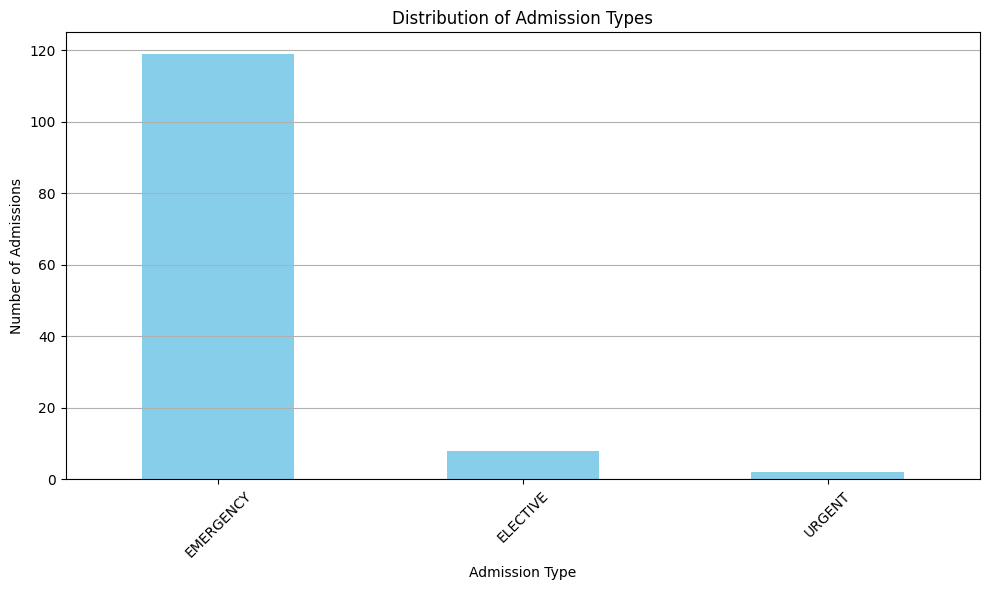

In [12]:
# Count occurrences of each unique value in the 'ADMISSION_TYPE' column
admission_type_counts = admissions['admission_type'].value_counts()

# Plot the counts as a bar plot
plt.figure(figsize=(10, 6))
admission_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [13]:
# Count occurrences of each discharge location
discharge_location_counts = admissions['discharge_location'].value_counts()

# Identify the discharge location with the highest count
most_used_discharge_location = discharge_location_counts.idxmax()

# Print the most commonly used discharge location
print(f"The most frequently used discharge location for admitted patients is: {most_used_discharge_location}")


The most frequently used discharge location for admitted patients is: DEAD/EXPIRED


In [14]:
# Filter to include only admitted patients with specific admission types
filtered_admissions = admissions[admissions['admission_type'].isin(['EMERGENCY', 'ELECTIVE', 'URGENT'])]

# Count the occurrences of each discharge location among the filtered admissions
discharge_location_counts = filtered_admissions['discharge_location'].value_counts()

# Identify the second most common discharge location
if len(discharge_location_counts) > 1:
    second_most_common_discharge_location = discharge_location_counts.index[1]
    print(f"The second most frequently used discharge location for admitted patients is: {second_most_common_discharge_location}")
else:
    print("Not enough discharge locations to determine the second most common one.")

The second most frequently used discharge location for admitted patients is: SNF


Top 3 most commonly used First Care Units for admitting patients

In [15]:
# Display the first 5 rows of the icustays dataset to preview the data
icustays.head(5)

# Display information about the icustays dataset, including column data types and non-null counts
icustays.info()

# Display statistical summary of numeric columns in the icustays dataset
icustays.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          136 non-null    int64  
 1   subject_id      136 non-null    int64  
 2   hadm_id         136 non-null    int64  
 3   icustay_id      136 non-null    int64  
 4   dbsource        136 non-null    object 
 5   first_careunit  136 non-null    object 
 6   last_careunit   136 non-null    object 
 7   first_wardid    136 non-null    int64  
 8   last_wardid     136 non-null    int64  
 9   intime          136 non-null    object 
 10  outtime         136 non-null    object 
 11  los             136 non-null    float64
dtypes: float64(1), int64(6), object(5)
memory usage: 12.9+ KB


,row_id,subject_id,hadm_id,icustay_id,first_wardid,last_wardid,los
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,29370.316176,28263.485294,153259.566176,250980.470588,34.470588,34.022059,4.452457
std,14550.435239,16008.281510,28054.220280,28455.125832,18.876182,19.280951,6.196828
min,12742.000000,10006.000000,100375.000000,201006.000000,7.000000,7.000000,0.105900
25%,12826.750000,10089.750000,129028.000000,224359.250000,14.750000,14.000000,1.233525
50%,41427.000000,40307.000000,157724.000000,250055.000000,33.000000,33.000000,2.111450
75%,42073.750000,42207.000000,174896.500000,277279.250000,52.000000,52.000000,4.329050
max,42714.000000,44228.000000,199395.000000,298685.000000,57.000000,57.000000,35.406500


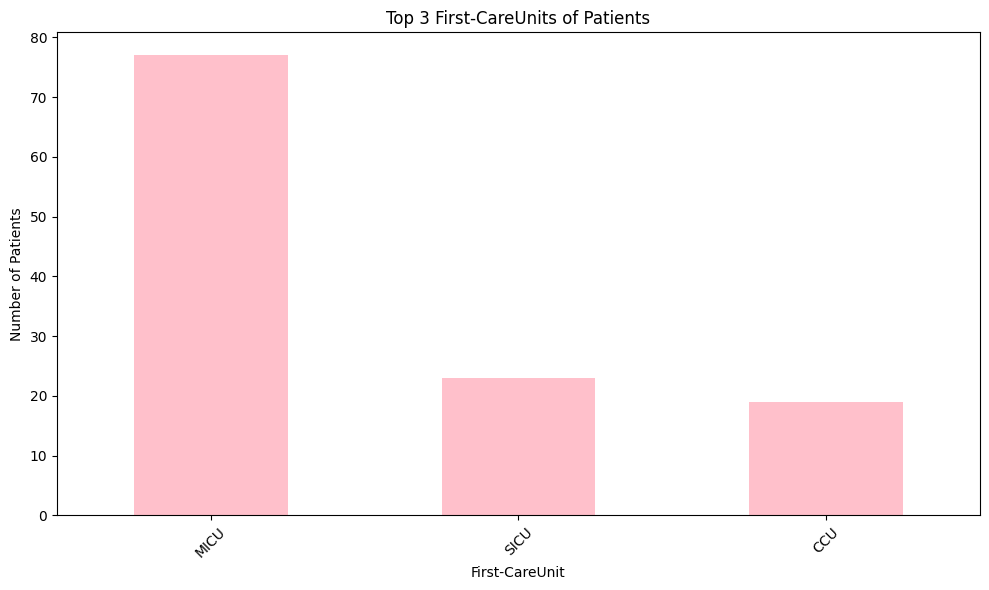

In [17]:
top_3_first_careunits = icustays['first_careunit'].value_counts().head(3)

# Plot the top 10 First-CareUnits using pandas plot
plt.figure(figsize=(10, 6))
top_3_first_careunits.plot(kind='bar', color='pink')
plt.title('Top 3 First-CareUnits of Patients')
plt.xlabel('First-CareUnit')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
# Loading the lab events data for analysis
labevents=pd.read_csv('/content/drive/My Drive/Exercises/LABEVENTS.csv')

# Display the first 5 rows of the labevents dataset to preview the data
labevents.head(5)

# Loading the d labitems data for analysis
dlabitems=pd.read_csv('/content/drive/My Drive/Exercises/D_LABITEMS.csv')


# Display the first 5 rows of the dlabitems dataset to preview the data
dlabitems.head(5)



,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.0,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.0,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.0,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.0,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.0,mg/dL,abnormal


In [23]:
# Get unique itemids for glucose-related blood tests
# This filters rows where LABEL is 'glucose' and FLUID is 'blood', then retrieves unique itemids
item_ids = dlabitems[(dlabitems['label'].str.lower() == 'glucose') & (dlabitems['fluid'].str.lower() == 'blood')]['itemid'].unique()

# Display all rows from d_labitems where itemid is in the extracted glucose-related itemids
dlabitems[dlabitems.itemid.isin(item_ids)]

,row_id,itemid,label,fluid,category,loinc_code
9,10,50809,Glucose,Blood,Blood Gas,2339-0
131,132,50931,Glucose,Blood,Chemistry,2345-7


In [26]:
#Filter lab events to keep only records with the identified item_id(s)
bg_events = dlabitems[dlabitems['itemid'].isin(item_ids)]
bg_events

,row_id,itemid,label,fluid,category,loinc_code
9,10,50809,Glucose,Blood,Blood Gas,2339-0
131,132,50931,Glucose,Blood,Chemistry,2345-7


In [32]:
# filter abnormal values
bg_events = labevents[labevents["flag"] == "abnormal"]
bg_events

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.00,mg/dL,abnormal
5,6244568,10006,NaN,50931,2164-09-24 20:21:00,126,126.00,mg/dL,abnormal
7,6244570,10006,NaN,50970,2164-09-24 20:21:00,5.6,5.60,mg/dL,abnormal
10,6244573,10006,NaN,51006,2164-09-24 20:21:00,31,31.00,mg/dL,abnormal
11,6244574,10006,NaN,51009,2164-09-24 20:21:00,12.7,12.70,ug/mL,abnormal
...,...,...,...,...,...,...,...,...,...
76065,20452675,44228,103379.0,51221,2170-12-24 04:09:00,24.2,24.20,%,abnormal
76066,20452676,44228,103379.0,51222,2170-12-24 04:09:00,8.3,8.30,g/dL,abnormal
76070,20452680,44228,103379.0,51265,2170-12-24 04:09:00,595,595.00,K/uL,abnormal
76072,20452682,44228,103379.0,51279,2170-12-24 04:09:00,2.76,2.76,m/uL,abnormal


In [34]:
# Filter Unique patients

bg_events.groupby('subject_id').first().reset_index()


,subject_id,row_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,10006,6244567,142345.0,50912,2164-09-24 20:21:00,7.0,7.0,mg/dL,abnormal
1,10011,6247415,105331.0,50861,2126-08-15 01:30:00,254,254.0,IU/L,abnormal
2,10013,6248349,165520.0,50878,2125-10-05 00:00:00,77,77.0,IU/L,abnormal
3,10017,6249535,199207.0,50852,2149-05-26 09:26:00,8.3,8.3,%,abnormal
4,10019,6250013,177759.0,50861,2163-05-14 19:53:00,176,176.0,IU/L,abnormal
...,...,...,...,...,...,...,...,...,...
95,44083,20434803,125157.0,51221,2112-04-12 07:30:00,29.9,29.9,%,abnormal
96,44154,20439399,174245.0,50893,2178-05-14 16:45:00,7.6,7.6,mg/dL,abnormal
97,44212,20446739,163189.0,50862,2123-11-24 14:40:00,2.9,2.9,g/dL,abnormal
98,44222,20450266,192189.0,50912,2180-07-19 04:15:00,1.7,1.7,mg/dL,abnormal


In [40]:
# Load ICD diagnosis data from CSV file
d_icd_diagnosis = pd.read_csv('/content/drive/My Drive/Exercises/D_ICD_DIAGNOSES.csv')

# Display the first 5 rows of the ICD diagnosis dataset to preview the data
d_icd_diagnosis.head(5)

# Load ICD diagnosis records from another file
diagnosis_icd = pd.read_csv('/content/drive/My Drive/Exercises/DIAGNOSES_ICD.csv')

# Display the first 5 rows of the diagnosis dataset to preview the data
diagnosis_icd.head(5)

# Extract unique ICD-9 codes related to chronic conditions
# This filters rows where 'short_title' or 'long_title' contains the word 'chronic' (case insensitive)
chronic_icd9_codes = d_icd_diagnosis[(d_icd_diagnosis['short_title'].str.lower().str.contains("chronic")) |
                                     (d_icd_diagnosis['long_title'].str.lower().str.contains("chronic"))]['icd9_code'].unique()

# Display all rows from d_icd_diagnosis where the ICD-9 code is in the extracted chronic ICD-9 codes
d_icd_diagnosis[d_icd_diagnosis.icd9_code.isin(chronic_icd9_codes)]



,row_id,icd9_code,short_title,long_title
265,266,0061,Chr amebiasis w/o absces,Chronic intestinal amebiasis without mention o...
461,462,0982,Chr gc infect lower gu,"Gonococcal infection, chronic, of lower genito..."
462,463,09830,Chr gc upper gu NOS,Chronic gonococcal infection of upper genitour...
463,464,09831,"Gc cystitis, chronic","Gonococcal cystitis, chronic"
464,465,09832,"Gc prostatitis, chronic","Gonococcal prostatitis, chronic"
...,...,...,...,...
13845,13846,73016,Chr osteomyelit-l/leg,"Chronic osteomyelitis, lower leg"
13846,13847,73017,Chr osteomyelit-ankle,"Chronic osteomyelitis, ankle and foot"
13847,13848,73018,Chr osteomyelit NEC,"Chronic osteomyelitis, other specified sites"
13848,13849,73019,Chr osteomyelit-mult,"Chronic osteomyelitis, multiple sites"


In [44]:
# Filter diagnosis records to include only those with chronic ICD-9 codes
chronic_diagnosis = diagnosis_icd[diagnosis_icd["icd9_code"].isin(chronic_icd9_codes)]

# Display the filtered dataset containing chronic diagnoses
chronic_diagnosis

# Count occurrences of chronic diagnoses grouped by ICD-9 code
# This counts the number of unique subjects associated with each chronic ICD-9 code
chronic_diagnosis_count = chronic_diagnosis.groupby("icd9_code")["subject_id"].count().sort_values(ascending=False).head(5)

# Display the top 5 most common chronic diagnoses
chronic_diagnosis_count


,subject_id
icd9_code,
5859,12
496,11
40390,10
40391,7
2800,6


In [42]:
# d_icd_diagnosis[d_icd_diagnosis.ICD9_CODE.isin(chronic_diagnosis_count.index.to_list())].reset_index(drop=True)
chronic_diagnosis_and_count = d_icd_diagnosis.join(chronic_diagnosis_count,  on="icd9_code").sort_values("subject_id", ascending=False).head(5)
chronic_diagnosis_and_count

,row_id,icd9_code,short_title,long_title,subject_id
5914,5915,5859,Chronic kidney dis NOS,"Chronic kidney disease, unspecified",12.0
5122,5123,496,Chr airway obstruct NEC,"Chronic airway obstruction, not elsewhere clas...",11.0
4314,4315,40390,Hy kid NOS w cr kid I-IV,"Hypertensive chronic kidney disease, unspecifi...",10.0
4315,4316,40391,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecifi...",7.0
2217,2218,2800,Chr blood loss anemia,Iron deficiency anemia secondary to blood loss...,6.0


<Figure size 1000x600 with 0 Axes>

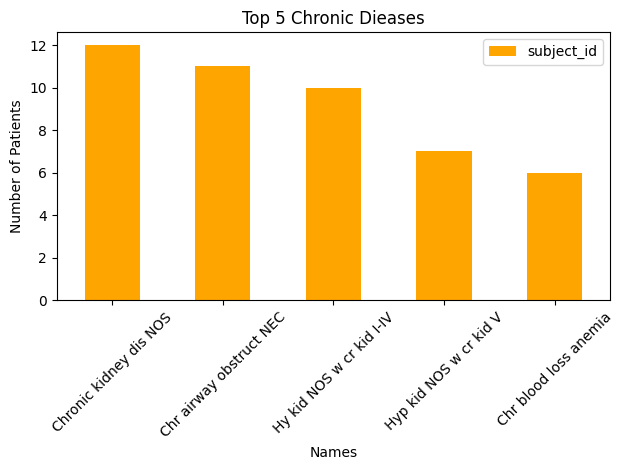

In [43]:
plt.figure(figsize=(10, 6))
chronic_diagnosis_and_count[["short_title", "subject_id"]].set_index("short_title").plot(kind='bar', color='orange')
plt.title('Top 5 Chronic Dieases')
plt.xlabel('Names')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()